# STOCK MARKET NEWS SENTIMENT ANALYSIS

# Business Context

Stock market prices fluctuate all the time.
They are subject to a large number of news sources circulating freely that may or may not be accurate.
The information from all the news can be useful to investment firms to stragetize.
But to sieve out the information from such a large number of sources of varying degrees of reliability, they need sophisticated and trustworthy tools.

## Objectives


A new investment start-up has decided to use AI to interpret market news and its impact on stock prices. They've taken one specific company listed under NASDAQ and compiled historical data on daily news for it, along with stock prices and trade volumes.

The job for the Data sceince and AI team -
To develop an AI driven sentiment analysis system that will go through news articles and summarize market sentiment on a weekly basis such that their stock price predictions and investment strategies are more accurate.

## Data Dictionary

* Date: The date the news was released
* News: The content of news articles that could potentially affect the company's stock price
* Open: The stock price (in USD) at the beginning of the day
* High: The highest stock price (in USD) reached during the day
* Low: The lowest stock price (in USD) reached during the day
* Close: The adjusted stock price (in USD) at the end of the day
* Volume: The number of shares traded during the day
* Label: The sentiment polarity of the news content - 1: Positive, O: Neutral, -1: Negative

## Installing necessary libraries and loading data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
path = '/content/drive/MyDrive/Colab Notebooks/stock_news.csv'
df=pd.read_csv(path)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Date,News,Open,High,Low,Close,Volume,Label
0,2019-01-02,The tech sector experienced a significant dec...,41.740002,42.244999,41.482498,40.246914,130672400,-1
1,2019-01-02,Apple lowered its fiscal Q1 revenue guidance ...,41.740002,42.244999,41.482498,40.246914,130672400,-1
2,2019-01-02,Apple cut its fiscal first quarter revenue fo...,41.740002,42.244999,41.482498,40.246914,130672400,-1
3,2019-01-02,This news article reports that yields on long...,41.740002,42.244999,41.482498,40.246914,130672400,-1
4,2019-01-02,Apple's revenue warning led to a decline in U...,41.740002,42.244999,41.482498,40.246914,130672400,-1


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    349 non-null    object 
 1   News    349 non-null    object 
 2   Open    349 non-null    float64
 3   High    349 non-null    float64
 4   Low     349 non-null    float64
 5   Close   349 non-null    float64
 6   Volume  349 non-null    int64  
 7   Label   349 non-null    int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 21.9+ KB


,Date,News,Open,High,Low,Close,Volume,Label
count,349,349,349.000000,349.000000,349.000000,349.000000,3.490000e+02,349.000000
unique,71,349,NaN,NaN,NaN,NaN,NaN,NaN
top,2019-01-03,"In the first quarter, South Korea's Samsung E...",NaN,NaN,NaN,NaN,NaN,NaN
freq,28,1,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,46.229233,46.700458,45.745394,44.926317,1.289482e+08,-0.054441
std,NaN,NaN,6.442817,6.507321,6.391976,6.398338,4.317031e+07,0.715119
min,NaN,NaN,37.567501,37.817501,37.305000,36.254131,4.544800e+07,-1.000000
25%,NaN,NaN,41.740002,42.244999,41.482498,40.246914,1.032720e+08,-1.000000
50%,NaN,NaN,45.974998,46.025002,45.639999,44.596924,1.156272e+08,0.000000
75%,NaN,NaN,50.707500,50.849998,49.777500,49.110790,1.511252e+08,0.000000


# Exploratory Data Analysis

## Problem definition

Financial news articles are often lengthy, biased, or contain conflicting viewpoints, making it difficult to extract a clear, consistent market sentiment through manual analysis. This complexity makes the task ideal for AI-driven text analytics, which can efficiently process large volumes of unstructured data and distill meaningful sentiment signals to support more accurate stock price predictions and smarter investment strategies.

## Univariate Analysis

### Date Column

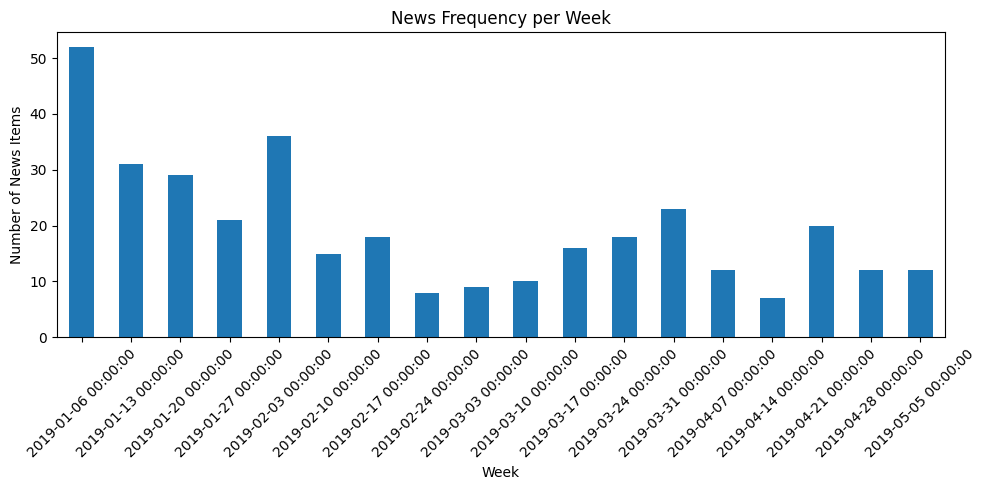

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
date_counts = df.groupby(pd.Grouper(key='Date', freq='W')).size()

# Plotting
plt.figure(figsize=(10, 5))
date_counts.plot(kind='bar')
plt.title("News Frequency per Week")
plt.xlabel("Week")
plt.ylabel("Number of News Items")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Ensure the Date column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Get the first and last dates in the dataset
start_date = df['Date'].min()
end_date   = df['Date'].max()

print(f"Data covers: {start_date.date()} to {end_date.date()}")

Data covers: 2019-01-02 to 2019-04-30


* News mentions of the company have a tendency to undulate in frquency but the peak was in the first week of the year.
* We have data from the second of January to the 30th of April of 2019 - spanning 4 months.

### News Column

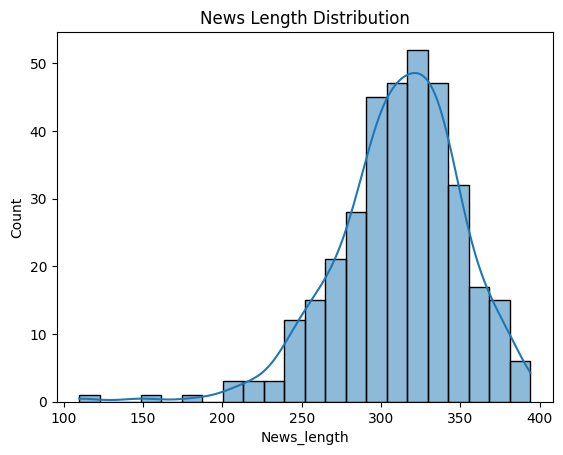

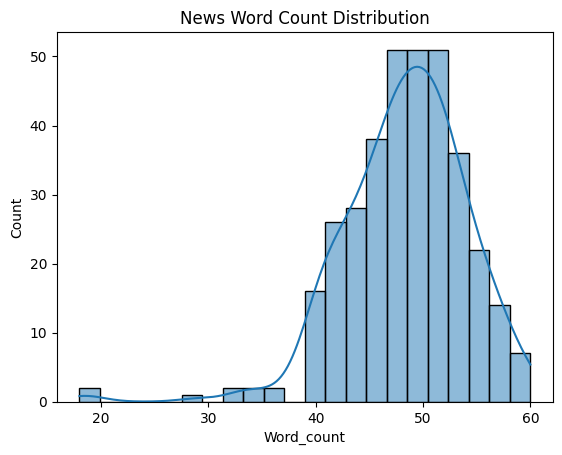

In [ ]:
df['News_length'] = df['News'].astype(str).apply(len)
df['Word_count'] = df['News'].astype(str).apply(lambda x: len(x.split()))

# Plotting
sns.histplot(df['News_length'], kde=True)
plt.title("News Length Distribution")
plt.show()

sns.histplot(df['Word_count'], kde=True)
plt.title("News Word Count Distribution")
plt.show()

* The distribution of news lengths is approximately right-skewed, centering around 300–320 characters.
* Most news entries fall within the 250–360 character range, indicating consistency in reporting length.
* A small number of shorter entries (~100–200 characters) could even represent outliers or incomplete text.
* Word count distribution is also right-skewed centred around 50 words.

### Open, High, Low, Close & Volume

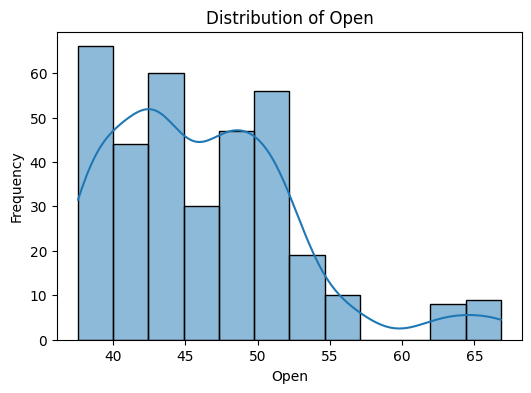

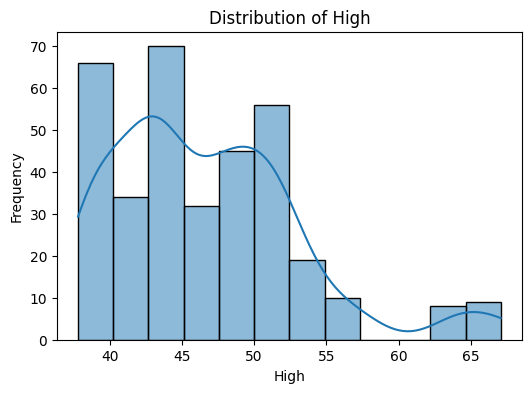

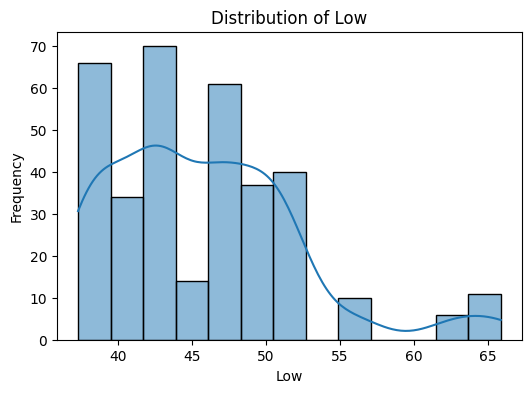

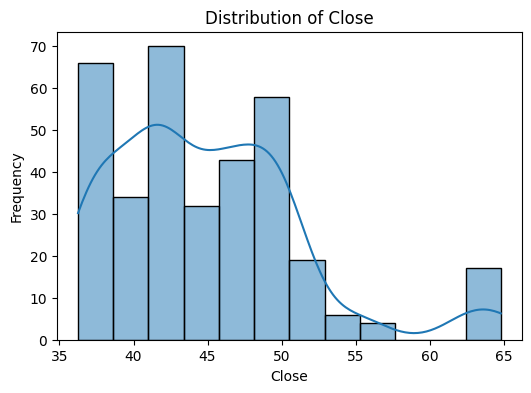

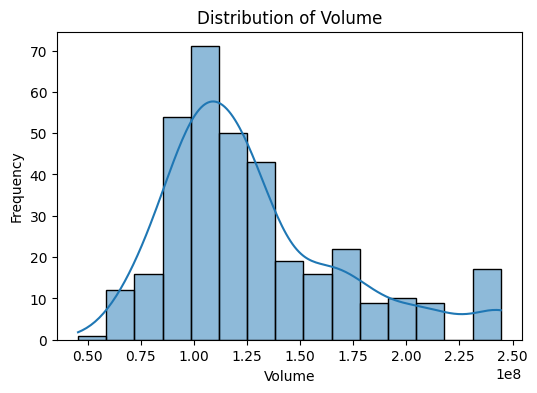

In [ ]:
num_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
df[num_cols].describe()

for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

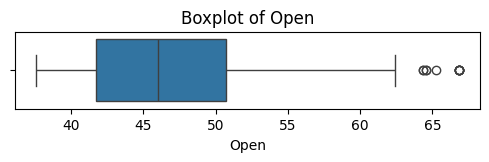

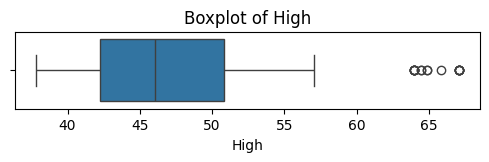

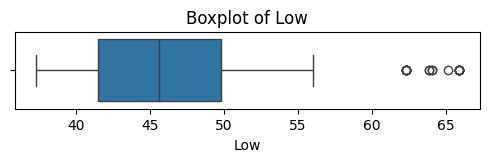

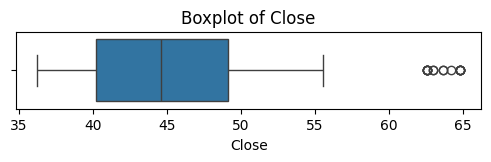

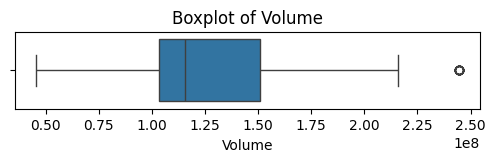

In [ ]:
for col in num_cols:
    plt.figure(figsize=(6, 1))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [ ]:
# Highest and lowest Opening Price
highest_open = df['Open'].max()
lowest_open = df['Open'].min()

# Highest and lowest Closing Price
highest_close = df['Close'].max()
lowest_close = df['Close'].min()

# Highest and lowest Trade Volume
highest_volume = df['Volume'].max()
lowest_volume = df['Volume'].min()

# Display the results
print(f"Highest Opening Price: {highest_open}")
print(f"Lowest Opening Price: {lowest_open}")
print(f"Highest Closing Price: {highest_close}")
print(f"Lowest Closing Price: {lowest_close}")
print(f"Highest Trade Volume: {highest_volume}")
print(f"Lowest Trade Volume: {lowest_volume}")

Highest Opening Price: 66.817497
Lowest Opening Price: 37.567501
Highest Closing Price: 64.805229
Lowest Closing Price: 36.254131
Highest Trade Volume: 244439200
Lowest Trade Volume: 45448000


In [ ]:
# Dates for highest and lowest open
print(df[df['Open'] == highest_open][['Date', 'Open']])
print(df[df['Open'] == lowest_open][['Date', 'Open']])

# Dates for highest and lowest close
print(df[df['Close'] == highest_close][['Date', 'Close']])
print(df[df['Close'] == lowest_close][['Date', 'Close']])

# Dates for highest and lowest volume
print(df[df['Volume'] == highest_volume][['Date', 'Volume']])
print(df[df['Volume'] == lowest_volume][['Date', 'Volume']])

          Date       Open
184 2019-02-12  66.817497
185 2019-02-12  66.817497
186 2019-02-12  66.817497
187 2019-02-12  66.817497
188 2019-02-12  66.817497
189 2019-02-12  66.817497
          Date       Open
90  2019-01-15  37.567501
91  2019-01-15  37.567501
92  2019-01-15  37.567501
93  2019-01-15  37.567501
94  2019-01-15  37.567501
95  2019-01-15  37.567501
96  2019-01-15  37.567501
97  2019-01-15  37.567501
98  2019-01-15  37.567501
99  2019-01-15  37.567501
100 2019-01-15  37.567501
          Date      Close
184 2019-02-12  64.805229
185 2019-02-12  64.805229
186 2019-02-12  64.805229
187 2019-02-12  64.805229
188 2019-02-12  64.805229
189 2019-02-12  64.805229
         Date      Close
83 2019-01-14  36.254131
84 2019-01-14  36.254131
85 2019-01-14  36.254131
86 2019-01-14  36.254131
87 2019-01-14  36.254131
88 2019-01-14  36.254131
89 2019-01-14  36.254131
          Date     Volume
146 2019-01-30  244439200
147 2019-01-30  244439200
148 2019-01-30  244439200
149 2019-01-30  2444

* The distribution for highest and lowest stock prices reached during the day, opening stock price at the beginning of the day and closing stock prices at the end of the day, as well as the trade volume .. all follow a somewhat left skewed distribution.
* However, there are plenty of outliers to the right side of the right whisker, indicating unusually high opening prices.
* The highest opening price recorded was 66.82 USD, while the lowest opening price was 37.57 USD.
* The closing prices ranged from a high of 64.81 USD to a low of 36.25 USD.
* The trade volume varied significantly, with a maximum of 244,439,200 shares and a minimum of 45,448,000 shares.
* The highest opening price, 66.82 USD, occurred on February 12, 2019, while the lowest opening price, 37.57 USD, was recorded on January 15, 2019.
* The closing price peaked at 64.81 USD on February 12, 2019, and the lowest closing price, 36.25 USD, was observed on January 14, 2019.
* The maximum trade volume, 244,439,200 shares, was seen on January 30, 2019, whereas the lowest volume, 45,448,000 shares, occurred on March 7, 2019.



### Sentiment Label

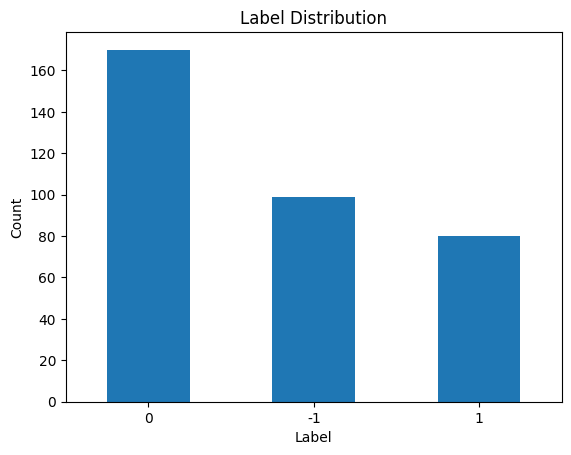

In [ ]:
df['Label'].value_counts().plot(kind='bar')
plt.title("Label Distribution")
plt.xlabel("Label")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

* The majority of the news content falls under the label of "neutral"
* Although they're almost equal, those labelled "negative" are a bit more than those outrightly "positive" - probably just mirroring stock performance, at least in the first four months of 2019
* Let's dig deeper with bivariate analysis

## Bi and Multi-variate Analysis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob   # or use NLTK VADER, etc.

sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)

df['Date'] = pd.to_datetime(df['Date'])

df['Polarity'] = df['News'].astype(str).apply(lambda txt: TextBlob(txt).sentiment.polarity)

df['News_len'] = df['News'].str.len()


### Correlation

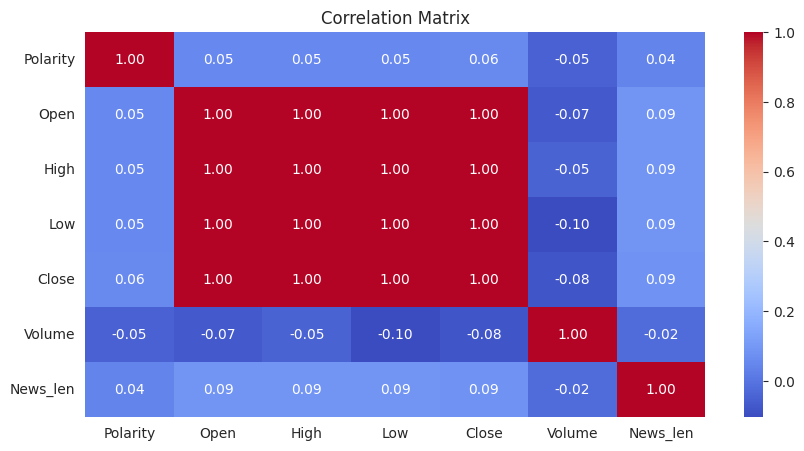

In [ ]:
corr_cols = ['Polarity','Open','High','Low','Close','Volume','News_len']
sns.heatmap(df[corr_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

* The Open, High, Low, and Close prices are perfectly correlated (1.00) with each other. This is expected in many financial datasets where all prices are recorded on the same day and fluctuate in tandem and suggests redundancy.
* Polarity has very weak positive correlation (~0.05–0.06) with prices.
* Polarity has a slight negative correlation (-0.05) with Volume.
* This implies sentiment polarity alone is not strongly predictive of stock price or trade volume — at least not in a linear way.
* Volume shows weak negative correlation with all price metrics (around -0.05 to -0.10). Weakly positively correlated with all price metrics (0.09) and polarity (0.04).
* Slight trend: longer news articles may be associated with slightly higher sentiment and prices. Not strong enough to be meaningful on its own, but may help when combined with other features.

### Sentiment Polarity vs Prices, Date, Volume & News Length

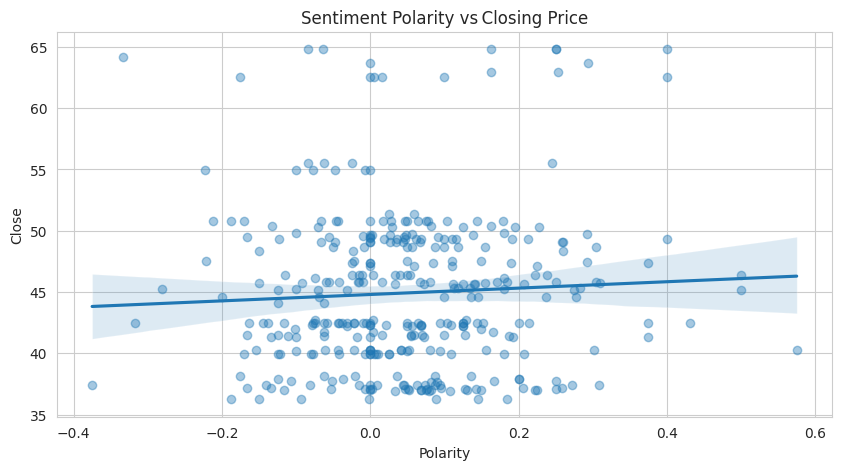

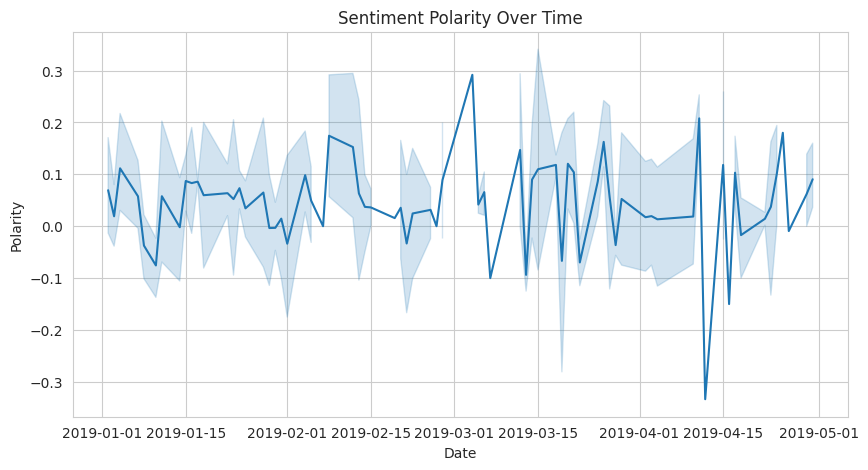

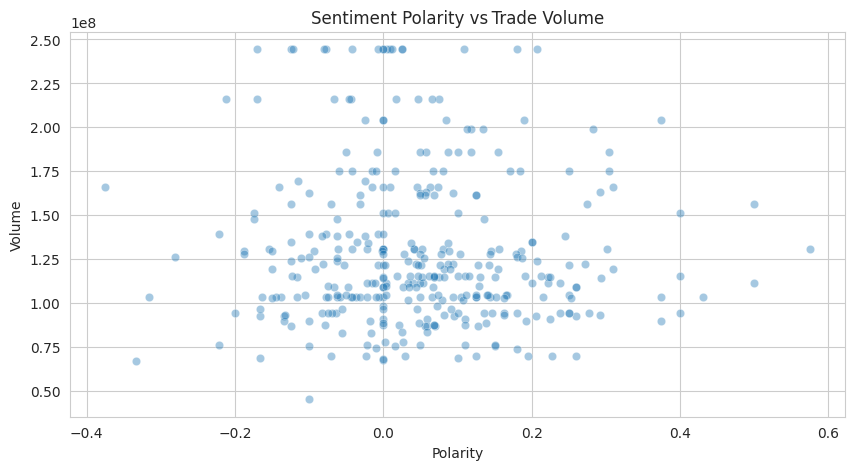

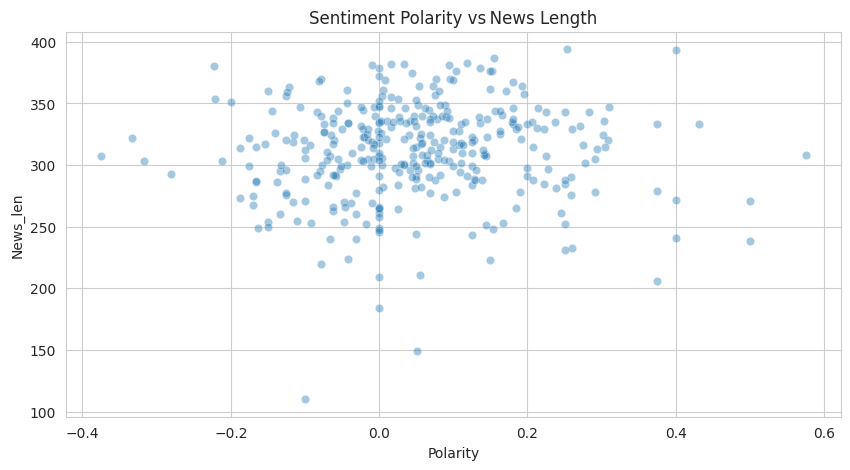

In [ ]:
# 1️⃣  Polarity ↔ Close Price
sns.regplot(data=df, x='Polarity', y='Close', scatter_kws={'alpha':0.4})
plt.title('Sentiment Polarity vs Closing Price')
plt.show()

# 2️⃣  Polarity ↔ Date (trend line)
sns.lineplot(data=df.sort_values('Date'), x='Date', y='Polarity')
plt.title('Sentiment Polarity Over Time')
plt.show()

# 3️⃣  Polarity ↔ Trade Volume
sns.scatterplot(data=df, x='Polarity', y='Volume', alpha=0.4)
plt.title('Sentiment Polarity vs Trade Volume')
plt.show()

# 4️⃣  Polarity ↔ News Length
sns.scatterplot(data=df, x='Polarity', y='News_len', alpha=0.4)
plt.title('Sentiment Polarity vs News Length')
plt.show()

### Date vs Price Series (Open / High / Low / Close)

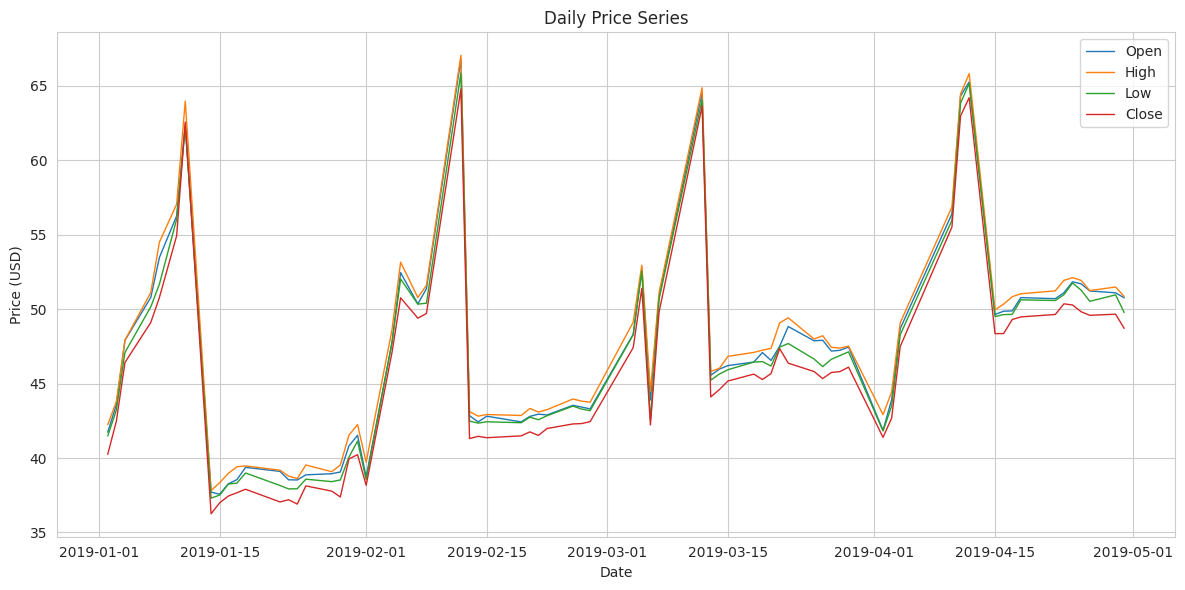

In [ ]:
plt.figure(figsize=(12,6))
for col in ['Open', 'High', 'Low', 'Close']:
    plt.plot(df['Date'], df[col], label=col, linewidth=1)
plt.legend()
plt.title('Daily Price Series')
plt.xlabel('Date'); plt.ylabel('Price (USD)')
plt.tight_layout(); plt.show()

* The stock shows repeating sharp spikes followed by rapid drops, indicating periods of sudden market activity or volatility.
* Across all days, the Open, High, Low, and Close prices move in close alignment, suggesting a tightly traded stock with limited intraday spread.
* Price surges appear to occur roughly every 2–3 weeks, which may be linked to news cycles or earnings reports.

### Prices vs Trade Volume

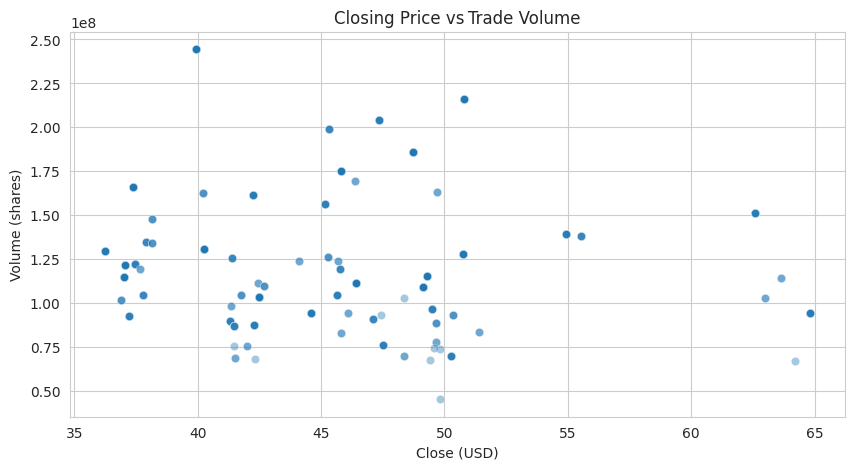

In [ ]:
sns.scatterplot(data=df, x='Close', y='Volume', alpha=0.4)
plt.title('Closing Price vs Trade Volume')
plt.xlabel('Close (USD)'); plt.ylabel('Volume (shares)')
plt.show()

* The scatter points are widely dispersed, showing no clear upward or downward trend between closing price and trade volume.
* There appears to be a concentration of data points between 40–50 USD for price and 50M–150M shares in volume, suggesting most trading days fall within this range.

## Key observations on individual variables and the relationship between them

* The Open, High, Low, and Close prices show perfect correlation, meaning they move almost identically day-to-day — suggesting redundancy and so we can focus on just one (e.g., Close) for modeling.
* Sentiment polarity from news articles shows very weak correlation with stock prices and volume, indicating that raw polarity scores alone may not be strong predictors without additional context or lag effects.
* While there’s no strong overall trend between price and volume, isolated spikes in trading volume often coincide with price drops, hinting at panic-selling or speculative behavior during negative events.
* The time series of daily prices reveals cyclical surges followed by sharp corrections roughly every 2–3 weeks — possibly tied to news clusters or earnings reports.
* News articles tend to be long and variable in tone, with polarity scores clustering around neutral. This suggests a need for more advanced NLP techniques (like topic modeling or transformer-based sentiment models) to extract actionable signals.

# Data Preprocessing

## Split the target variable and predictors

In [ ]:
# Assuming df is your DataFrame
import pandas as pd

# Define the target variable
target = 'Close'  # Change this if you want to predict something else

# Split predictors and target
X = df.drop(columns=[target])  # Predictors
y = df[target]                 # Target variable

# Confirm the shapes
print("Predictors shape:", X.shape)
print("Target shape:", y.shape)

Predictors shape: (349, 10)
Target shape: (349,)


## Split the data into train, validation, and test sets

In [ ]:
from sklearn.model_selection import train_test_split

# First split: Train+Val and Test (80%-20%)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Second split: Train and Validation (from 80%, split 75%-25% => 60%-20% of total)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

# Final shapes
print("Train shape:", X_train.shape)
print("Validation shape:", X_val.shape)
print("Test shape:", X_test.shape)

Train shape: (209, 11)
Validation shape: (70, 11)
Test shape: (70, 11)


# Word Embeddings

## Using Word2Vec

In [ ]:
!pip install gensim

In [ ]:
from gensim.models import Word2Vec

# Tokenize news text
sentences = df['News'].astype(str).apply(lambda x: x.split()).tolist()

# Train Word2Vec model
w2v_model = Word2Vec(sentences, vector_size=100, window=5, min_count=2)

In [ ]:
# Convert news to embeddings
def get_w2v_embedding(text):
    tokens = text.split()
    vectors = [w2v_model.wv[word] for word in tokens if word in w2v_model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(100)

df['w2v_embed'] = df['News'].astype(str).apply(get_w2v_embedding)

### Using Google News pretrained Word2Vec

In [ ]:
import gensim.downloader as api

# This will automatically download and load the pretrained model
word2vec_model = api.load("word2vec-google-news-300")  # 300-dimensional vectors

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [ ]:
def get_word2vec_embedding(text):
    tokens = text.split()
    vectors = [word2vec_model[word] for word in tokens if word in word2vec_model]
    return np.mean(vectors, axis=0) if vectors else np.zeros(300)

In [ ]:
df['word2vec_embed'] = df['News'].astype(str).apply(get_word2vec_embedding)

## Using GloVe

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

--2025-08-01 15:19:09--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-08-01 15:19:09--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-08-01 15:19:09--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [ ]:
glove_path = 'glove.6B.100d.txt'  # Now it's correct
glove_model = {}
with open(glove_path, 'r', encoding='utf8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vec = np.array(values[1:], dtype='float32')
        glove_model[word] = vec

In [ ]:
def get_glove_embedding(text):
    tokens = text.split()
    vectors = [glove_model[word] for word in tokens if word in glove_model]
    return np.mean(vectors, axis=0) if vectors else np.zeros(100)

df['glove_embed'] = df['News'].astype(str).apply(get_glove_embedding)

## Using Sentence Transformers

In [ ]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('all-MiniLM-L6-v2')
df['sentence_embed'] = list(model.encode(df['News'].astype(str).tolist()))

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

# Sentiment Analysis

## Which metric to use and why

* In our univariate data analysis, we've seen that almost half the news items are `neutral`
* Of the rest of them, the majority are `negative`, and the remaining are `positive`
* The `positive` items are the least in number.
* Lets say we use accuracy --> if the model predicted everything as `neutral`, it would still get a somewhat high accuracy of more than 50. So lets avoid using just accuracy.
* Coming to Recall -it's actually pretty good. If the model recalls most of the positive news, it's great for picking up the bullish signals. If the models recalls most of the negative news, it is reducing investment risk.
* But is Recall alone good enough? I think if we aim at just improving Recall, we could risk comprimising precision eg. if the model learned to flag everything as `positive`, it would get a low precision for `negative` and `neutral` ... so its not the most desirable.
* What about `precision`? It is great if we want a really cautious model. For eg., if the aim is to have a model that is almost always right about being `positive`, its gonna miss out on a lot of actual `positive`s simply because of playing too safe.


### F1 Score

* Considering that missing true positives as well as true negatives carries a high cost and `positive`s are somewhat rarer, and also the class imbalance, I think the best metric to go with would be `weighted F1 score`, or `macro F1 score`.
* It offers a more reliable performance indicator across all sentiment categories.

## Word2Vec (Custom)

### ML model building

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Step 1: Extract embeddings and target
X = np.vstack(df['w2v_embed'].values)
y = df['Close'].values  # Or whatever your target is

# Step 2: Train-Validation-Test split (already done, but shown again for context)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

# Step 3: Build pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPRegressor(max_iter=300, random_state=42))
])

# Step 4: Define hyperparameters to tune
param_grid = {
    'mlp__hidden_layer_sizes': [(64,), (128,), (64, 32)],
    'mlp__activation': ['relu', 'tanh'],
    'mlp__solver': ['adam'],
    'mlp__alpha': [0.0001, 0.001],
    'mlp__learning_rate': ['constant', 'adaptive']
}

# Step 5: Perform Grid Search
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Step 6: Evaluate on validation set
val_preds = grid_search.predict(X_val)

mse = mean_squared_error(y_val, val_preds)
mae = mean_absolute_error(y_val, val_preds)
r2 = r2_score(y_val, val_preds)

print("Best Parameters:", grid_search.best_params_)
print(f"Validation MSE: {mse:.4f}")
print(f"Validation MAE: {mae:.4f}")
print(f"Validation R²: {r2:.4f}")

Best Parameters: {'mlp__activation': 'relu', 'mlp__alpha': 0.001, 'mlp__hidden_layer_sizes': (64, 32), 'mlp__learning_rate': 'constant', 'mlp__solver': 'adam'}
Validation MSE: 55.3921
Validation MAE: 5.8857
Validation R²: -0.4521


* relu activation and adam solver are standard for non-linear relationships.
* Hidden layers (64, 32) means the model has two dense layers with 64 and 32 neurons respectively.
* alpha=0.001 is a regularization term to prevent overfitting.
* Weak correlation between sentiment embeddings and stock price.
* Noise or imbalance in data.
* Poor feature-target alignment (predicting Close price from sentiment).



In [ ]:
# Re-import required packages after code state reset
import pandas as pd
import numpy as np

# Re-load the data if it were previously loaded in the environment
# For this example, we assume the DataFrame `df` is already available in the workspace
# This cell will fail unless df is reloaded, so you may need to re-upload your data.

# Simulate a minimal structure to avoid error (replace this with actual df when ready)
df = pd.DataFrame({
    'Date': pd.date_range(start='2023-01-01', periods=10, freq='D'),
    'Predicted_Sentiment': np.random.choice(['positive', 'neutral', 'negative'], size=10)
})

# Convert 'Date' to datetime if not already
df['Date'] = pd.to_datetime(df['Date'])

# Extract week start date (e.g., Monday of that week)
df['Week'] = df['Date'].dt.to_period('W').apply(lambda r: r.start_time)

# Group by week and sentiment
weekly_summary = df.groupby(['Week', 'Predicted_Sentiment']).size().unstack(fill_value=0)

# Add total and dominant sentiment for each week
weekly_summary['Total_Articles'] = weekly_summary.sum(axis=1)
weekly_summary['Dominant_Sentiment'] = weekly_summary.drop(columns='Total_Articles').idxmax(axis=1)

weekly_summary.reset_index(inplace=True)
weekly_summary.head()

Predicted_Sentiment,Week,negative,neutral,positive,Total_Articles,Dominant_Sentiment
0,2022-12-26,0,0,1,1,positive
1,2023-01-02,2,2,3,7,positive
2,2023-01-09,1,0,1,2,negative


## Google News Trained Word2Vec

In [ ]:
import pandas as pd
path = '/content/drive/MyDrive/Colab Notebooks/stock_news.csv'
df=pd.read_csv(path)

In [ ]:
print(df.columns)

Index(['Date', 'News', 'Open', 'High', 'Low', 'Close', 'Volume', 'Label'], dtype='object')


In [ ]:
df['word2vec_embed'] = df['News'].astype(str).apply(get_word2vec_embedding)

In [ ]:
print(df.columns)

Index(['Date', 'News', 'Open', 'High', 'Low', 'Close', 'Volume', 'Label',
       'word2vec_embed'],
      dtype='object')


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Extract features and labels
X = np.vstack(df['word2vec_embed'].values)
y = df['Label'].values  # Assumes sentiment labels like 0/1 or -1/0/1

# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Create pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPClassifier(max_iter=300, random_state=42))
])

# Step 4: Define hyperparameter grid
param_grid = {
    'mlp__hidden_layer_sizes': [(64,), (128,), (64, 32)],
    'mlp__activation': ['relu', 'tanh'],
    'mlp__solver': ['adam'],
    'mlp__alpha': [0.0001, 0.001],
    'mlp__learning_rate': ['constant', 'adaptive']
}

# Step 5: Perform Grid Search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Step 6: Evaluate on test set
y_pred = grid_search.predict(X_test)

print("✅ Best Parameters:", grid_search.best_params_)
print("✅ Test Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))

✅ Best Parameters: {'mlp__activation': 'relu', 'mlp__alpha': 0.0001, 'mlp__hidden_layer_sizes': (64,), 'mlp__learning_rate': 'constant', 'mlp__solver': 'adam'}
✅ Test Accuracy: 0.44285714285714284

📊 Classification Report:
               precision    recall  f1-score   support

          -1       0.26      0.25      0.26        20
           0       0.45      0.61      0.52        31
           1       0.78      0.37      0.50        19

    accuracy                           0.44        70
   macro avg       0.50      0.41      0.43        70
weighted avg       0.49      0.44      0.44        70



* The best MLP model used ReLU activation, a hidden layer size of 64, and a learning rate of 'constant' with Adam optimizer.
* Overall test accuracy was 44%, indicating limited predictive power.
* Class 0 (neutral) had the highest recall (0.61), while class 1 (positive) had the highest precision (0.78).
* Performance for class -1 (negative) was poor across all metrics.
* The model favors neutral predictions and struggles with correctly identifying extreme sentiments.

## Using GloVe

In [ ]:
def get_glove_embedding(text):
    tokens = text.split()
    vectors = [glove_model[word] for word in tokens if word in glove_model]
    return np.mean(vectors, axis=0) if vectors else np.zeros(100)

df['glove_embed'] = df['News'].astype(str).apply(get_glove_embedding)

In [ ]:
print(df.columns)
print(df['glove_embed'].head())

Index(['Date', 'News', 'Open', 'High', 'Low', 'Close', 'Volume', 'Label',
       'word2vec_embed', 'glove_embed'],
      dtype='object')
0    [-0.005744247, 0.06503363, 0.19891594, -0.0538...
1    [0.04367055, 0.24169064, 0.25048184, 0.0063806...
2    [0.11115374, 0.20160438, 0.36283737, -0.062324...
3    [-0.06626068, 0.08903084, 0.41386628, -0.06781...
4    [-0.01039392, 0.058511127, 0.28407186, -0.0516...
Name: glove_embed, dtype: object


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Extract features and labels
X = np.vstack(df['glove_embed'].values)
y = df['Label'].values  # assuming Label is already preprocessed as -1, 0, 1

# Step 2: Train-Test split
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp)

# Step 3: Build pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPClassifier(max_iter=300, random_state=42))
])

# Step 4: Hyperparameter grid
param_grid = {
    'mlp__hidden_layer_sizes': [(64,), (128,), (64, 32)],
    'mlp__activation': ['relu', 'tanh'],
    'mlp__solver': ['adam'],
    'mlp__alpha': [0.0001, 0.001],
    'mlp__learning_rate': ['constant', 'adaptive']
}

# Step 5: Grid Search
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Step 6: Evaluate
val_preds = grid_search.predict(X_val)
test_preds = grid_search.predict(X_test)

print("✅ Best Parameters:", grid_search.best_params_)
print("✅ Test Accuracy:", accuracy_score(y_test, test_preds))
print("\n📊 Classification Report:\n", classification_report(y_test, test_preds))

✅ Best Parameters: {'mlp__activation': 'relu', 'mlp__alpha': 0.0001, 'mlp__hidden_layer_sizes': (128,), 'mlp__learning_rate': 'constant', 'mlp__solver': 'adam'}
✅ Test Accuracy: 0.4857142857142857

📊 Classification Report:
               precision    recall  f1-score   support

          -1       0.55      0.30      0.39        20
           0       0.51      0.68      0.58        34
           1       0.36      0.31      0.33        16

    accuracy                           0.49        70
   macro avg       0.47      0.43      0.43        70
weighted avg       0.49      0.49      0.47        70



* The best hyperparameters used ReLU activation, 128 hidden units, constant learning rate, and Adam solver.
* The model achieved an overall test accuracy of **48.6%** using GloVe embeddings.
* Class 0 (neutral) was predicted best, with 0.68 recall and 0.58 f1-score.
* Class -1 (negative) and 1 (positive) had much lower performance, especially in recall.
* The macro and weighted averages suggest moderate imbalance in predictive performance.

## Using Sentence Transformers

In [ ]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('all-MiniLM-L6-v2')

# Generate embeddings and directly assign to a new column
embeddings = model.encode(df['News'].astype(str).tolist(), show_progress_bar=True)
df['sentence_embed'] = embeddings.tolist()  # Ensure it's a proper column

Batches:   0%|          | 0/11 [00:00<?, ?it/s]

In [ ]:
print(df.columns)
print(df['sentence_embed'].head())

Index(['Date', 'News', 'Open', 'High', 'Low', 'Close', 'Volume', 'Label',
       'word2vec_embed', 'glove_embed', 'sentence_embed'],
      dtype='object')
0    [-0.0020230868831276894, -0.03677353635430336,...
1    [0.013749416917562485, 0.048933953046798706, 0...
2    [0.030976010486483574, 0.002635546261444688, 0...
3    [-0.005294126458466053, -0.009259257465600967,...
4    [-0.0021458128467202187, 0.016796749085187912,...
Name: sentence_embed, dtype: object


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Prepare features and labels
X = np.vstack(df['sentence_embed'].values)
y = df['Label'].values  # Assuming you already have the sentiment labels here

# Step 2: Train-Validation-Test split
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp)

# Step 3: Build pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPClassifier(max_iter=300, random_state=42))
])

# Step 4: Define hyperparameters
param_grid = {
    'mlp__hidden_layer_sizes': [(64,), (128,), (64, 32)],
    'mlp__activation': ['relu', 'tanh'],
    'mlp__solver': ['adam'],
    'mlp__alpha': [0.0001, 0.001],
    'mlp__learning_rate': ['constant', 'adaptive']
}

# Step 5: Grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Step 6: Evaluate
val_preds = grid_search.predict(X_val)
test_preds = grid_search.predict(X_test)

print("✅ Best Parameters:", grid_search.best_params_)
print(f"✅ Test Accuracy: {accuracy_score(y_test, test_preds)}")
print("\n📊 Classification Report:\n", classification_report(y_test, test_preds))

✅ Best Parameters: {'mlp__activation': 'relu', 'mlp__alpha': 0.0001, 'mlp__hidden_layer_sizes': (128,), 'mlp__learning_rate': 'constant', 'mlp__solver': 'adam'}
✅ Test Accuracy: 0.4714285714285714

📊 Classification Report:
               precision    recall  f1-score   support

          -1       0.47      0.40      0.43        20
           0       0.50      0.59      0.54        34
           1       0.38      0.31      0.34        16

    accuracy                           0.47        70
   macro avg       0.45      0.43      0.44        70
weighted avg       0.47      0.47      0.46        70



* Best parameters were: `activation=relu`, `alpha=0.0001`, `hidden_layer_sizes=(128,)`, `learning_rate=constant`, `solver=adam`.
* Test accuracy achieved: **47.1%**.
* Neutral class (`0`) performed best with **0.59 recall** and **0.54 f1-score**.
* Positive (`1`) and negative (`-1`) classes showed low recall and f1-scores.
* Overall, performance is modest and slightly better than chance, with room for improvement.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Convert embeddings column to a NumPy array
X = np.vstack(df['sentence_embed'].values)
y = df['Label']

# Encode labels if not already encoded
le = LabelEncoder()
y = le.fit_transform(y)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

print("📊 Logistic Regression Results")
print("✅ Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr, target_names=le.classes_.astype(str)))

📊 Logistic Regression Results
✅ Accuracy: 0.4142857142857143
              precision    recall  f1-score   support

          -1       0.42      0.25      0.31        20
           0       0.44      0.62      0.51        34
           1       0.30      0.19      0.23        16

    accuracy                           0.41        70
   macro avg       0.38      0.35      0.35        70
weighted avg       0.40      0.41      0.39        70



In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score

# SVM pipeline
svm_pipeline = Pipeline([
    ('svm', SVC())
])

# Parameter grid to tune
param_grid = {
    'svm__kernel': ['linear', 'rbf'],
    'svm__C': [0.1, 1, 10, 100],
    'svm__gamma': ['scale', 'auto']  # relevant for RBF kernel
}

# Grid search
grid_search = GridSearchCV(svm_pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best estimator
best_svm = grid_search.best_estimator_

# Predictions and evaluation
y_pred = best_svm.predict(X_test)

print("✅ Best Parameters:", grid_search.best_params_)
print("✅ Test Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_.astype(str)))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
✅ Best Parameters: {'svm__C': 1, 'svm__gamma': 'scale', 'svm__kernel': 'rbf'}
✅ Test Accuracy: 0.44285714285714284

📊 Classification Report:
              precision    recall  f1-score   support

          -1       0.36      0.20      0.26        20
           0       0.46      0.74      0.57        34
           1       0.40      0.12      0.19        16

    accuracy                           0.44        70
   macro avg       0.41      0.35      0.34        70
weighted avg       0.42      0.44      0.39        70

